Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, November 23, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

YOUR ANSWER HERE

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

YOUR ANSWER HERE

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

YOUR ANSWER HERE

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

In [ ]:
# YOUR CODE HERE

## Assignment 1: Properties of morphological operators [5 Points]

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-05 slides 4-14).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

Erosion is a morphological operator used to reduce or simply thin-out a shape or region, i.e. a text by using a structuring element S. The way erosion works is: Assuming we have a input binary image (a matrix) and the binary matrix S, which moves across the binary image line by line to produce and output image. As S is a matrix of 1s (as defined in the formula on p. 4 in the slides), 1 (the central point of S) is assigned to the result image only if S is completely contained by the input image, then the pixel is preserved(1), else removed(0). 

Dilation is a dual operation to erosion, meaning that it is defined via erosion via set complementation. What this means is that in contrast to erosion, dilation instead of thinning-out the region, it thickens it. Instead of removeing holes, it fills the up. This is possible by the binary matrix S  being applied to the input image, going line by line and assigning 1 to the resulting pixel. Then if at least one of the elements in the S binary matrix covers the 1-pixel of the input image, we assign 1, else is 0. 

### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

YOUR ANSWER HERE

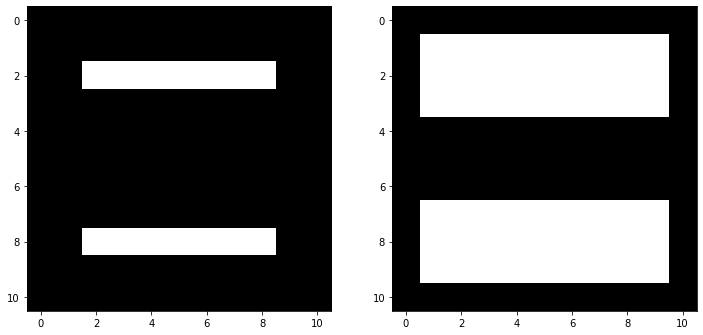

In [68]:
import numpy as np
from skimage.morphology import square, dilation

img = np.zeros((11,11), dtype=np.uint8)
img2 = np.zeros((11,11), dtype=np.uint8)
img[(2,8),2:9] = 255
img2[(2,8),2:9] = 255

img_dil = dilation(img, square(3))
img_dil2 = dilation(img2, square(3))

superpos = np.add(img_dil, img_dil2)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(superpos)
plt.show()

### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\ominus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

It can be seen from the example shown that dilation and erotion are assosiative.

## Assignment 2: Application [5 Points]


### a) Boundary extraction

Extract the boundary of a shape using opening or closing. You may use `binary_dilation` or `binary_erosion` from `scipy.ndimage.morphology`. Can you achieve a thicker boundary?

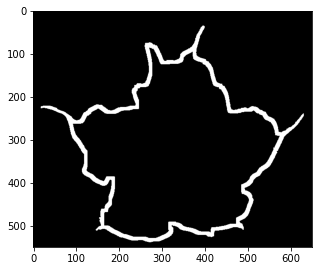

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import scipy.ndimage.morphology as morph
from imageio import imread
import cv2 as cv

def my_boundary(img):
    
    # Increment S shape for a thicker boundary
    # the larger the structuring element is, the higher porbability of erosion
    s = np.ones((3,3))
    
    # Included more iterations for a thicker boundary
    img_ero = morph.binary_erosion(img, structure=s, iterations=8)
    boundary = np.logical_xor(img, img_ero)
    
    return boundary
    
img = imread("images/engelstrompete.png") > 0
plt.figure(figsize=(5,5))
plt.gray()
plt.imshow(my_boundary(img))
plt.show()

### b)  Distance transform

Implement distance transform according to the ideas of (CV-05 slides 34ff).  Discuss the effect of different structuring elements.

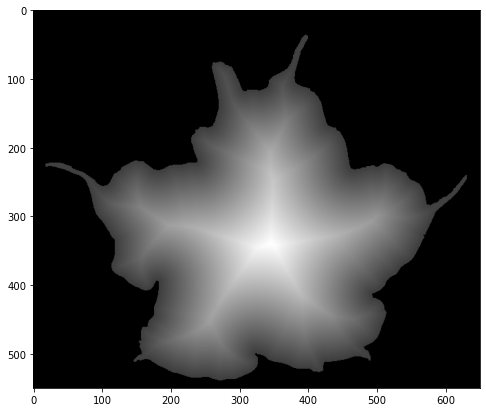

In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import morphology as morph
from imageio import imread
import cv2 as cv

def my_distance_transform(img):
    """Distance transform of binary image.

    Args:
    img (ndarray of bools): A binary image.
        
    Returns:
    dt (ndarray of ints): The distance transform of the input image.
    """
    
    # compute inverted iamge b*
    #     inverted_img = ~img
    dt = np.zeros(img.shape,np.int32)

    dt = morph.distance_transform_edt(img)

    return dt

img = imread("images/engelstrompete.png") > 0
plt.figure(figsize=(8,8))
# plt.imshow(my_distance_transform(img))
plt.imshow(my_distance_transform(img) + 50 * img)
plt.show()

YOUR ANSWER HERE

### c) Morphing

Write a function `my_morph` that implements morphing according to (CV-05 slide 41). You may use your function `my_distance_transform` from part b), or the function `distance_transform_edt` from `scipy.ndimage.morphology`.

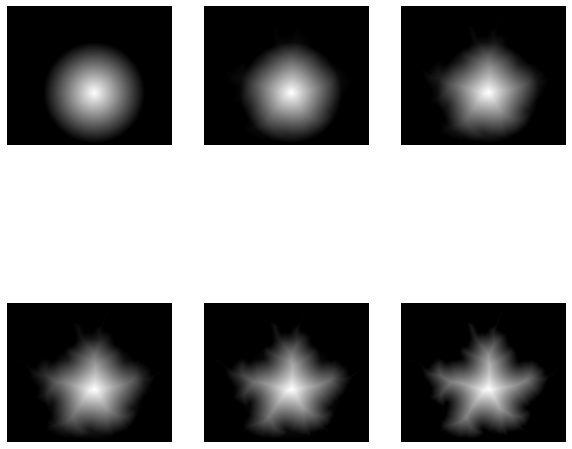

In [88]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
from imageio import imread
import cv2 as cv


def my_morph(A,B,ratio):
    """Morphing from binary image A to image B.

    Args:
        A (ndarray of bools): A binary image (start).
        B (ndarray of bools): A binary image (target), same shape as A.
        ratio (float from 0.0 to 1.0): The ratio of image A and image B.
            0.0=only image A, 1.0=only image B.
        
    Returns:
        morph (ndarray of bools): A binary intermediate image between A and B.
        
    """
    result = np.zeros(A.shape, bool)
    da = my_distance_transform(A)
    db = my_distance_transform(B)
    
    di = (ratio * db + (1 - ratio) * da) / 1
    
    result = di
    return result

img1 = imread("images/kreis.png") > 0
img2 = imread("images/engelstrompete.png") > 0


plt.figure(figsize=(10,10))
plt.gray()
for i, ratio in enumerate(np.linspace(0, 1, 6), 1):
    plt.subplot(2, 3, i)
    plt.imshow(my_morph(img1, img2, ratio))
    plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


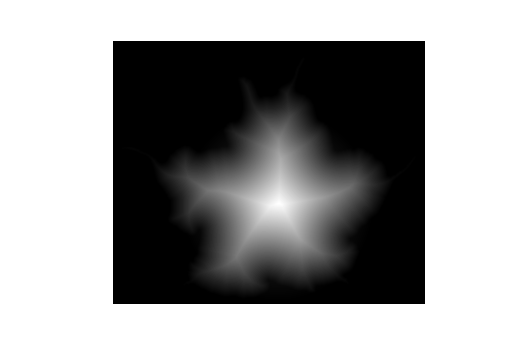

In [89]:
# If you want to see your morph as an animation, run this cell. 
# Close the output (press the blue "Stop interaction" button) once you are done!

# Due to some matplotlib problem you may have to restart your kernel!
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i, ratio in enumerate(np.linspace(0, 1, 24), 1):
    plt.axis('off')
    im = plt.imshow(my_morph(img1, img2, ratio), cmap='gray', animated=True)
    ims.append([im])  
    
ani = animation.ArtistAnimation(fig, ims + list(reversed(ims)), interval=100, blit=True)

fig.show()

## Assignment 3: Implementation: Skeletonization [5 Points]

### a) Skeletonization with hit-or-miss

Explain in your own words, how the hit-or-miss operator can be used for skeletonization (cf CV-05 slide 49).  

YOUR ANSWER HERE

### b) Implementation of skeletonization

Now use this method to implement your own skeletonization function. It is ok to use
`scipy.ndimage.morphology.binary_hit_or_miss` here (but of course *not* `skimage.morphology.skeletonize` or similar functions). Compare your result with (CV-05 slide 50). Note that computing the skeleton using this method may take some time ...

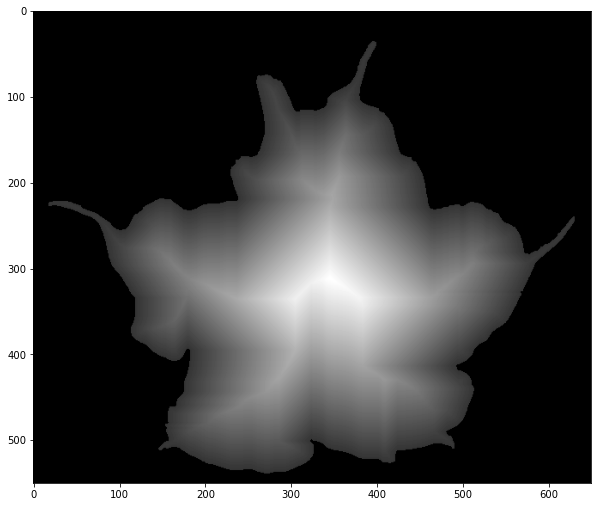

In [101]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
from imageio import imread

def my_skeletonize(img):
    """
    Compute the skeloton of a binary image using hit_or_miss operator.
    
    Parameters
    ----------
    img : ndarray of bools
        Binary image to be skeletonized.
    
    Returns
    -------
    skeleton : ndarray of bools
        The skeleton of the input image.
    """
    s_left = np.array(([[0, 1, 1],
                         [0, 1, 1],
                         [0, 1, 1]]))
    s_up = np.rot90(s_left)
    s_right = np.rot90(s_up)
    s_down = np.rot90(s_right)
    
    s_diagonal_1 = np.array(([[1, 1, 1],
                            [0, 1, 1],
                            [0, 0, 1]]))
    s_diagonal_2 = np.rot90(s_diagonal_1)
    s_diagonal_3 = np.rot90(s_diagonal_2)
    s_diagonal_4 = np.rot90(s_diagonal_3)
    
    kernels = [s_left, s_up, s_right, s_down, s_diagonal_1, s_diagonal_2, s_diagonal_3, s_diagonal_4]
    
    for i, k in enumerate(kernels):
            img = morph.binary_hit_or_miss(img, structure1=k)

    return img


img = imread("images/engelstrompete.png") > 0
skel = my_skeletonize(img)
result = morph.distance_transform_cdt(img, metric='taxicab') + (50 * img)
result[morph.binary_dilation(skel)] = 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(result)
plt.show()

## Assignment 4: Custom Structuring Element [5 points]

Landsat 7 is a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: https://landsat.usgs.gov/slc-products-background


### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-05, 24ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images (CV-05, slide 51).  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

NameError: name 'thresh_img' is not defined

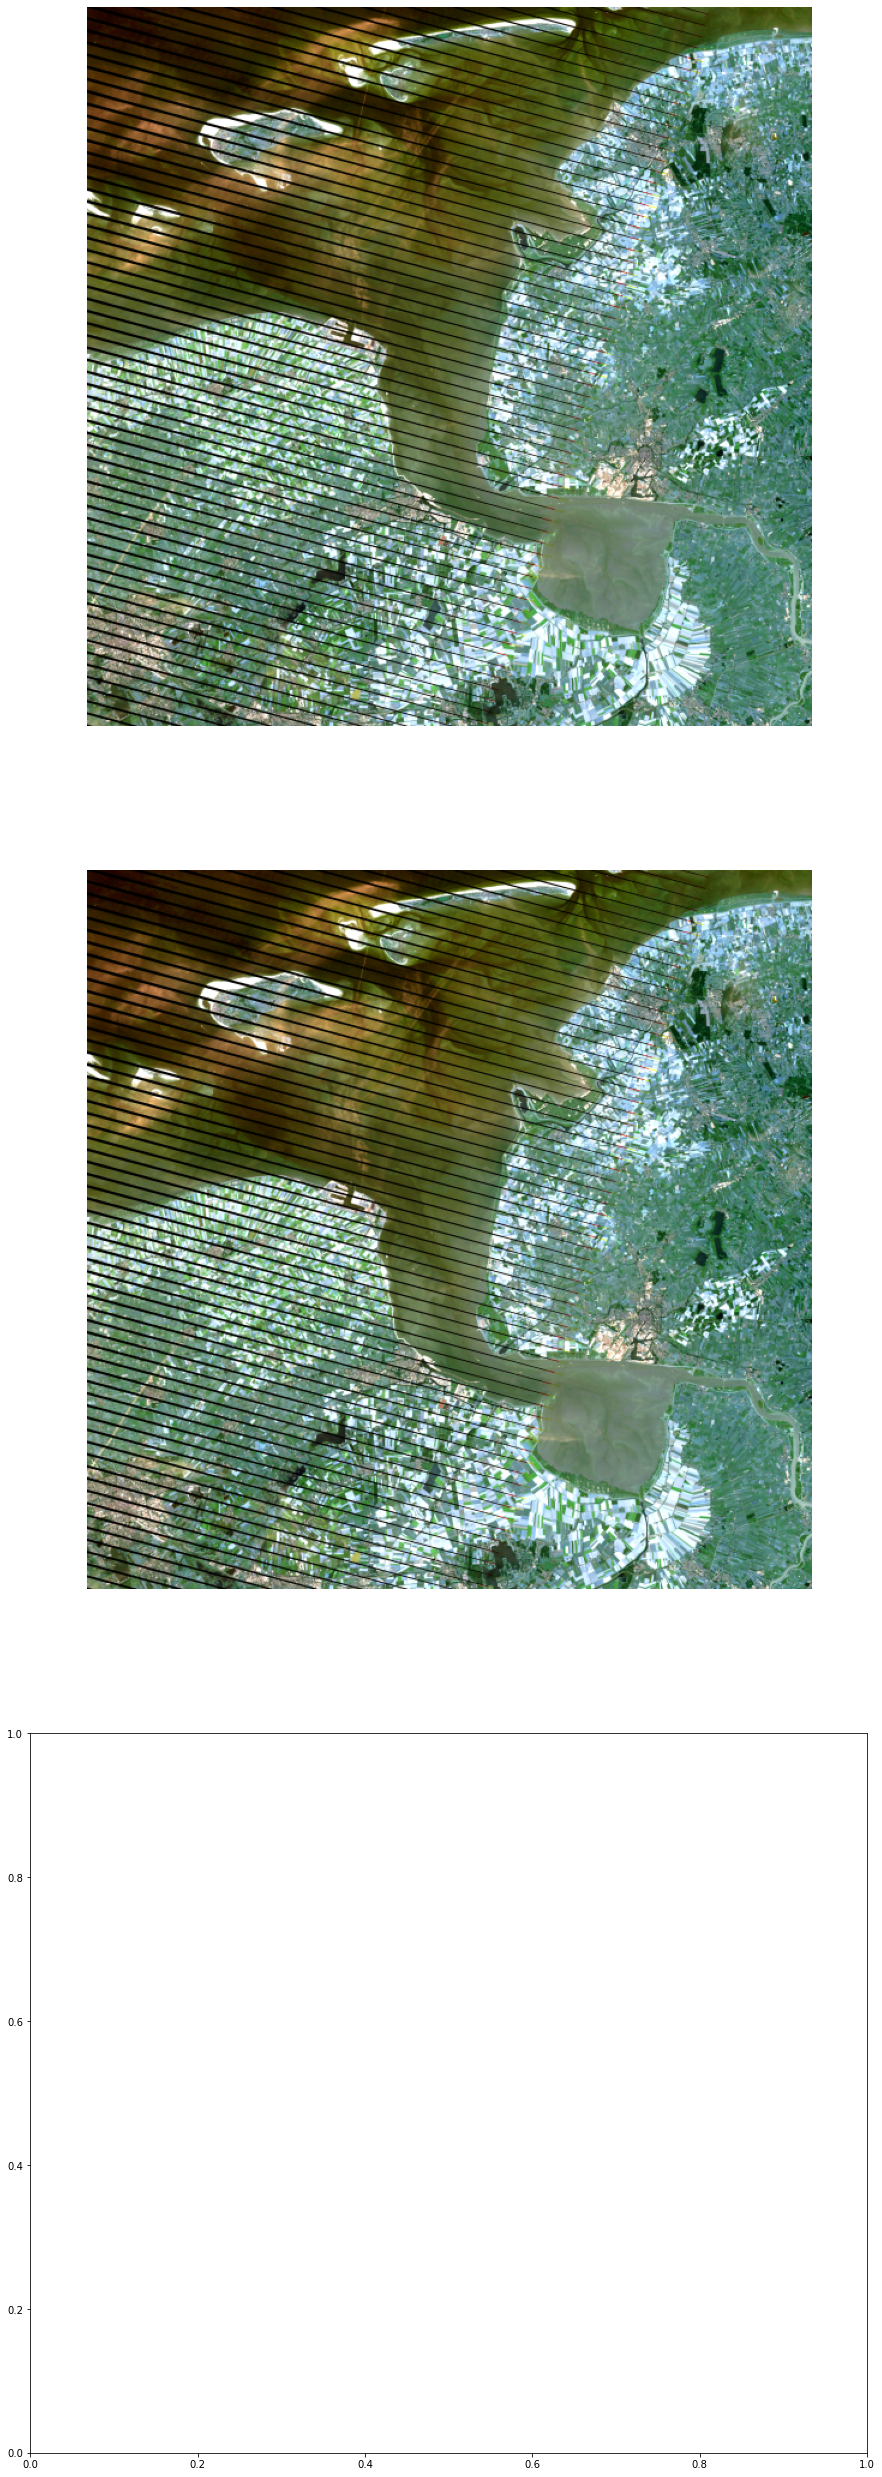

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
import scipy.ndimage as ndimg
from skimage import color
from skimage.transform import rescale as rescale
from imageio import imread


angle = 15
thresh = .3
struc_elem = np.ones((5,1), dtype=bool)

img = imread("images/landsat_stack2.png")
img2 = img.copy()
img3 = img.copy()

# YOUR CODE HERE
img = (img - np.min(img))/np.ptp(img)
img3 = (img3 - np.min(img3))/np.ptp(img3)


plt.figure(figsize=(15,45))
plt.subplot(3,1,1); plt.imshow(img); plt.axis('off')
plt.subplot(3,1,2); plt.imshow(img3); plt.axis('off')
plt.subplot(3,1,3); plt.imshow(thresh_img); plt.axis('off')
plt.imshow(thresh_img)
plt.show()


### c) Bonus
Can you think of (and implement) other ways to add the missing data? 


YOUR ANSWER HERE